# Load GNSS data (.csv)

In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt

# path = "gnss_data.csv"
# df = pd.read_csv(path)
# df.head()

import pandas as pd
import matplotlib.pyplot as plt

# --- Load ---
path = "gnss_data.csv"
df = pd.read_csv(path)

# --- Parse + clean ---
df["dates"] = pd.to_datetime(df["dates"], errors="coerce")
df = df.dropna(subset=["dates"])  # drop rows with bad dates

In [2]:
df.head(5)

,pnt_id,pnt_name,pnt_lat,pnt_lon,pnt_xrd,pnt_yrd,dates,n,e,u,sn,se,su
0,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2002-11-20,0.000426,0.007671,0.005879,0.000932,0.000673,0.002627
1,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-12,0.000447,-0.001009,-0.005334,0.000888,0.000654,0.002506
2,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-11,0.000381,0.000116,-0.005035,0.000889,0.000652,0.002511
3,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-10,0.000678,-0.001208,-0.006365,0.000893,0.000657,0.002522
4,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-09,-0.000864,-0.002044,-0.009819,0.000904,0.000663,0.002558


In [3]:
################################################################################
#
#   pnt_id      : GNSS station ID
#   pnt_name    : GNSS station location name
#   pnt_lat     : latitude (degrees)
#   pnt_lon     : longitude (degrees)
#   pnt_xrd     : RD X coordinate (meters)
#   pnt_yrd     : RD Y coordinate (meters)
#   dates       : observation date (YYYY-MM-DD)
#   n, e, u     : north, east, up coordinates (mm)
#   sn, se, su  : north, east, up standard deviation (mm)
#
################################################################################

# Plot locations

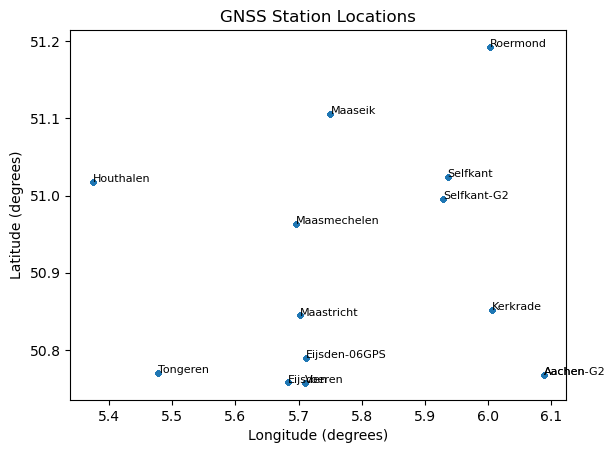

In [4]:
plt.scatter(df['pnt_lon'], df['pnt_lat'], s=10)
for name in df["pnt_name"].unique():
    subset = df[df["pnt_name"] == name]
    x = subset["pnt_lon"].iloc[0]
    y = subset["pnt_lat"].iloc[0]
    plt.text(x, y, name, fontsize=8)
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.title('GNSS Station Locations')
plt.show()


# Plot all data including heights

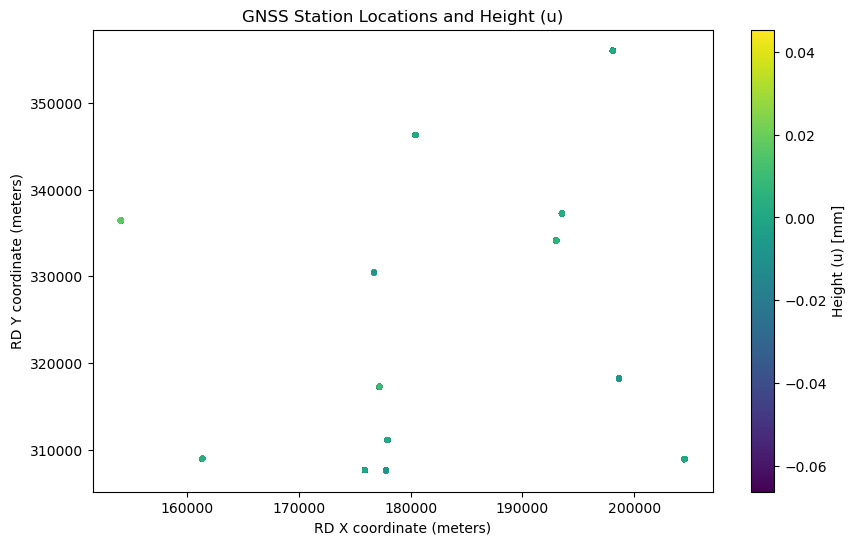

In [5]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['pnt_xrd'], df['pnt_yrd'], c=df['u'], cmap='viridis', s=10)
plt.xlabel('RD X coordinate (meters)')
plt.ylabel('RD Y coordinate (meters)')
plt.title('GNSS Station Locations and Height (u)')
plt.colorbar(sc, label='Height (u) [mm]')
# plt.xlim(170000, 180000)
# plt.ylim(300000, 310000)
plt.show()

In [6]:
def plot_station_timeseries(df, station_name=None, station_id=None, cols=("n", "e", "u")):
    """
    Plot GNSS time series for one station.
    Provide either station_name (e.g. "Aachen") or station_id (e.g. "0591").
    """
    if station_name is not None:
        sub = df.loc[df["pnt_name"] == station_name].copy()
        label = station_name
    elif station_id is not None:
        # pnt_id might be read as int; compare as string for safety
        sub = df.loc[df["pnt_id"].astype(str) == str(station_id)].copy()
        label = f"ID {station_id}"
    else:
        raise ValueError("Provide station_name or station_id.")

    if sub.empty:
        raise ValueError(f"No data found for {label}.")

    sub = sub.sort_values("dates")

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(10, 4))
    for c in cols:
        ax.plot(sub["dates"], sub[c], label=c)

    ax.set_title(f"GNSS time series – {label}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Displacement (m)")
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()

    return sub  # handy if you want to inspect/filter further


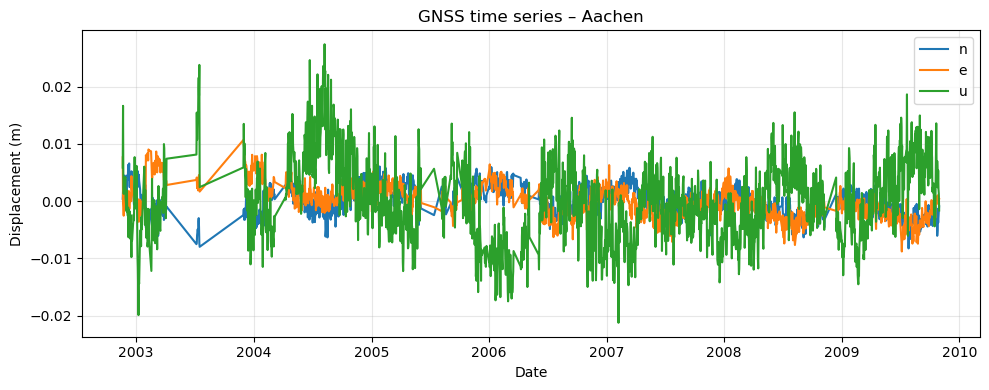

In [7]:
# --- Example: Aachen ---
_ = plot_station_timeseries(df, station_name="Aachen", cols=("n", "e", "u"))

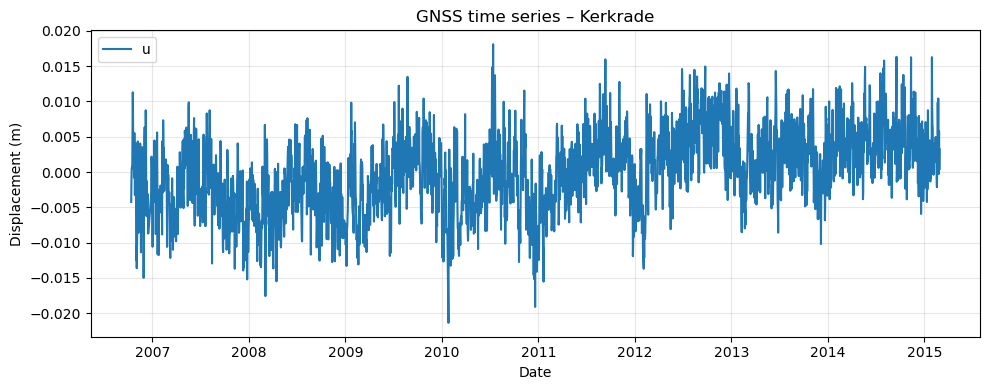

In [8]:
_ = plot_station_timeseries(df, station_name="Kerkrade", cols=("u"))
# or: _ = plot_station_timeseries(df, station_id="0591", cols=("n","e","u"))